# Model Evaluation

In [1]:
from sklearn import datasets

In [3]:
from sklearn import metrics

In [5]:
from sklearn.model_selection import KFold, cross_val_score

In [7]:
from sklearn.pipeline import make_pipeline

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
digits = datasets.load_digits()

In [12]:
features = digits.data

In [13]:
target = digits.target

In [14]:
stdz = StandardScaler()

In [15]:
log = LogisticRegression()

In [16]:
pipeline = make_pipeline(stdz,log)

In [18]:
kf = KFold(n_splits = 10,shuffle =True,random_state = 1)

In [19]:
cv_results = cross_val_score(pipeline , features,target,cv = kf,scoring = "accuracy",n_jobs = -1)

In [20]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [22]:
cv_results.mean()

0.9693916821849783

# Binary classifer Predictions

## Accuracy = (TP+TN)/(TP+TN+FP+FN)
## Precision  = TP/(TP+FP)

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.datasets import make_classification

In [18]:
x,y =make_classification(n_samples = 10000,n_features= 3,n_informative = 3,n_redundant = 0,n_classes= 2,random_state = 1)

In [20]:
x.shape , y.shape

((10000, 3), (10000,))

In [25]:
logi = LogisticRegression()

In [26]:
cross_val_score(logi , x ,y ,scoring = "accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [27]:
cross_val_score(logi, x,y,scoring = "precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

# Roc_Auc curve

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
import matplotlib.pyplot as plt

In [23]:
features ,target = make_classification(n_samples=10000,n_features = 10,n_classes = 2,n_informative=3,random_state = 3)

In [24]:
features_train,features_test,target_train,traget_test = train_test_split(features,target,test_size=0.1,random_state = 1)

In [26]:
logi = LogisticRegression()

In [27]:
logi.fit(features_train,target_train)

LogisticRegression()

In [29]:
target_prob = logi.predict_proba(features_test)

In [32]:
target_prob

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

In [35]:
 pred_prob= target_prob[:,1]

In [37]:
false_positive,true_positive,threshold = roc_curve(traget_test,pred_prob)

Text(0.5, 0, 'False positive')

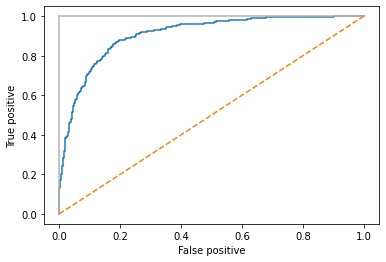

In [47]:
plt.plot(false_positive,true_positive)
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1], c= ".7")
plt.plot([0,1], ls = "--")
plt.ylabel("True positive")
plt.xlabel("False positive")
## for a good model area under the curve is always maximum

# Evaluating regression models

In [1]:
#mean square error & R-square

In [2]:
from sklearn.datasets import make_regression

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
features,target = make_regression(n_samples = 1000,n_features = 3,n_informative =3,n_targets=1,noise = 50,coef = False, random_state=1)

In [8]:
lr =LinearRegression()

In [11]:
cross_val_score(lr,features,target , scoring = 'neg_mean_squared_error')

array([-2727.02267722, -2239.6422813 , -2563.28346584, -2274.92909672,
       -2754.38874775])

In [12]:
cross_val_score(lr,features,target,scoring = 'r2')

array([0.88618765, 0.90862511, 0.89591157, 0.90117199, 0.91588612])

# Evaluating clustering models

In [13]:
import numpy as np

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
from sklearn.cluster import KMeans

In [20]:
from sklearn import datasets
from sklearn.datasets import make_blobs

In [28]:
features,_ = make_blobs(n_samples=1000,n_features=10,centers=2,cluster_std=0.5,shuffle = True,random_state=1)

In [29]:
models = KMeans(n_clusters=2,random_state=1).fit(features)

In [31]:
target_predicted = models.labels_

In [35]:
silhouette_score(features,target_predicted)

0.8916265564072142

# Custom metrics using make_scorer

In [1]:
from sklearn.metrics import make_scorer,r2_score

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.datasets import make_regression

In [5]:
features,target= make_regression(n_samples=100,n_features =3,random_state=1)

In [6]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=1)

In [14]:
features_train.shape, target_train.shape,      features_test.shape,    target_test.shape

((90, 3), (90,), (10, 3), (10,))

In [53]:
classifier = Ridge()

In [54]:
model = classifier.fit(features_train,target_train)

In [56]:
target_predicted = model.predict(features_test)

In [57]:
r2_score(target_test,target_predicted)

0.9997906102882058

In [59]:
def custom_metric(target_test,target_predicted):
    r2=r2_score(target_test,target_predicted)
    return r2

In [61]:
custom_metric

<function __main__.custom_metric(target_test, target_predicted)>

In [67]:
score = make_scorer(custom_metric,greater_is_better = True)

In [68]:
score(model ,features_test,target_test)

0.9997906102882058